# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import datetime as dt
import nltk as nltk
from dotenv import load_dotenv
from datetime import datetime
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from nltk import ngrams

analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AdamF\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
en_bitcoin_articles = newsapi.get_everything(
    q="Bitcoin AND bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Check the total number of news articles featuring Bitcoin
print(f"Total number of news articles featuring Bitcoin, bitcoin or BTC - {en_bitcoin_articles['totalResults']}")

# Print the tenth Bitcoin news article as a sample for inspection
print(f"Sample news article featuring Bitcoin, bitcoin or BTC - {en_bitcoin_articles['articles'][9]}")

Total number of news articles featuring Bitcoin, bitcoin or BTC - 1719
Sample news article featuring Bitcoin, bitcoin or BTC - {'source': {'id': None, 'name': 'StockNews.com'}, 'author': 'Subhasree Kar', 'title': 'Is Bitfarms a Good Crypto Mining Stock to Buy for 2022?', 'description': 'The shares of bitcoin self-mining company Bitfarms (BITF) have gained more than 150% in price over the past year, benefiting from bullish trends in the crypto space. However, the stock...', 'url': 'https://stocknews.com/news/bitf-forr-dfin-sc-is-bitfarms-a-good-crypto-mining-stock-to-buy-for/', 'urlToImage': 'https://assets.entrepreneur.com/providers/stocknews/hero-image-stocknews-411404.jpeg', 'publishedAt': '2022-01-04T14:58:48Z', 'content': 'The shares of bitcoin self-mining company Bitfarms (BITF) have gained more than 150% in price over the past year, benefiting from bullish trends in the crypto space. However, the stock traded in a do… [+5716 chars]'}


In [5]:
# Fetch the Ethereum news articles
en_ethereum_articles = newsapi.get_everything(
    q="Ethereum AND ethereum AND ETH",
    language='en',
    page_size=100,
    sort_by="relevancy"
)

# Check the total number of news articles featuring Ethereum
print(f"Total number of news articles featuring Ethereum, ethereum or ETH - {en_ethereum_articles['totalResults']}")

# Print the tenth Ethereum news article as a sample for inspection
print(f"Sample news article featuring Ethereum, ethereum or ETH - {en_ethereum_articles['articles'][6]}")

Total number of news articles featuring Ethereum, ethereum or ETH - 815
Sample news article featuring Ethereum, ethereum or ETH - {'source': {'id': 'time', 'name': 'Time'}, 'author': 'Andrew R. Chow', 'title': 'How Blockchain Could Solve the Problem of Digital Identity', 'description': 'When Vitalik Buterin, the founder of Ethereum, has been asked lately about his favorite projects being built on the blockchain, he often names Proof of Humanity.', 'url': 'https://time.com/6142810/proof-of-humanity/', 'urlToImage': 'https://api.time.com/wp-content/uploads/2022/01/IMG_3792.jpeg?quality=85&crop=0px%2C273px%2C1125px%2C588px&resize=1200%2C628&strip', 'publishedAt': '2022-01-27T09:39:28Z', 'content': 'A version of this article was published in TIME’s newsletter Into the Metaverse. Subscribe for a weekly guide to the future of the Internet.You can find past issues of the newsletter here.\r\nWhen Vita… [+9697 chars]'}


In [6]:
# Create the Bitcoin sentiment scores DataFrame
# Create empty list to populate with article details and sentiment scores
bitcoin_sentiments = []

# Get required details from articles response returned by api 
for article in en_bitcoin_articles["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        # Add article details as dicts to bitcoin_sentiments list
        bitcoin_sentiments.append({
            "Title": title,
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
# Create Bitcoin Sentiments DataFrame from the bitcoin_sentiments list of dicts
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Inspect the DataFrame
bitcoin_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000
1,Bitcoin slumps to lowest since September - Reu...,"london, jan 7 (reuters) - bitcoin on friday sl...",2022-01-07,-0.3818,0.000,0.077,0.923
2,BUZZ Crypto stocks slip as bitcoin briefly sli...,** shares of cryptocurrency and blockchain-rel...,2022-01-10,0.3818,0.128,0.057,0.815
3,Crypto investors buy the dip as Bitcoin falls ...,welcome to kitco news' 2022 outlook series. th...,2022-01-10,0.1531,0.076,0.061,0.863
4,Bitcoin death cross is staring down bulls afte...,after one of roughest patches ever for bitcoin...,2022-01-11,-0.5563,0.063,0.156,0.781


In [7]:
# Create the Ethereum sentiment scores DataFrame
# Create empty list to populate with article details and sentiment scores
ethereum_sentiments = []

# Get required details from articles response returned by api 
for article in en_ethereum_articles["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        # Add article details as dicts to ethereum_sentiments list
        ethereum_sentiments.append({
            "Text": text,
            "Title Ehterum": title,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title": title,
        })
        
    except AttributeError:
        pass
    
# Create Ethereum Sentiments DataFrame from the bitcoin_sentiments list of dicts
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Inspect the DataFrame
ethereum_df.head()

,Text,Title Ehterum,Date,Compound,Positive,Negative,Neutral,Title
0,"in a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,2022-01-20,0.0000,0.000,0.000,1.000,Crypto.com admits over $30 million stolen by h...
1,"in an interview with bloomberg tv, crypto.com'...",Crypto.com loses $34 million in hack that affe...,2022-01-20,0.1027,0.046,0.000,0.954,Crypto.com loses $34 million in hack that affe...
2,"online thieves made off with ""wrapped ethereum...",Blockchain platform Wormhole says it's retriev...,2022-02-03,0.1027,0.131,0.092,0.778,Blockchain platform Wormhole says it's retriev...
3,"online thieves made off with 120,000 weth, or ...",Hacker steals over $320M from blockchain platf...,2022-02-03,-0.6808,0.051,0.174,0.775,Hacker steals over $320M from blockchain platf...
4,the crypto market's whiplash volatility can ma...,Crypto Exchange Shuts Down Withdrawals After H...,2022-01-19,0.5574,0.129,0.000,0.871,Crypto Exchange Shuts Down Withdrawals After H...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.050639,0.058330,0.044990,0.896690
std,0.407468,0.063321,0.056508,0.075608
min,-0.802000,0.000000,0.000000,0.712000
25%,-0.273200,0.000000,0.000000,0.847750
50%,0.000000,0.058000,0.000000,0.906500
75%,0.366350,0.101500,0.086000,0.945250
max,0.835700,0.233000,0.204000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.137444,0.084530,0.05176,0.863700
std,0.446240,0.067785,0.06993,0.090609
min,-0.868900,0.000000,0.00000,0.596000
25%,-0.052050,0.000000,0.00000,0.802500
50%,0.202300,0.079500,0.00000,0.865500
75%,0.476700,0.131000,0.09375,0.932000
max,0.796400,0.309000,0.25700,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: The analysis demonstrates that Ethereum has the highest mean positive score. 

Q: Which coin had the highest compound score?

A: The analysis demonstrates that Ethereum has the highest compound score. 

Q. Which coin had the highest positive score?

A: The analysis demonstrates that Ethereum has the highest positive score. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'urlToImage','url','char','ha'}

In [12]:
 # Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words and convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for bitcoin
# Copy the Bitcoin DF ready to add Tokens new column
bitcoin_tokens_df = bitcoin_df.copy()

# Create empty tokenized list
tokenized = []

# Tokenize the "Text" column for each row of the DataFrame
for article in bitcoin_tokens_df['Text']:
    # Use the tokenizer function to tokenize the article
    tokenized_articles = tokenizer(article)
    # Append all tokens to the tokenized list of dicts
    tokenized.append({'tokens':tokenized_articles})

# Create DataFrame of tokens for each article
tokens_df= pd.DataFrame(tokenized)

# Combine the Tokens dataframe with the original
bitcoin_tokens_df['Tokens'] = tokens_df

# Inspect the DataFrame
bitcoin_tokens_df.head()

,Title,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,Crypto.com admits over $30 million stolen by h...,"in a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000,"[new, blog, post, company, said, eth, bitcoin,..."
1,Bitcoin slumps to lowest since September - Reu...,"london, jan 7 (reuters) - bitcoin on friday sl...",2022-01-07,-0.3818,0.000,0.077,0.923,"[london, jan, reuters, bitcoin, friday, slumpe..."
2,BUZZ Crypto stocks slip as bitcoin briefly sli...,** shares of cryptocurrency and blockchain-rel...,2022-01-10,0.3818,0.128,0.057,0.815,"[share, cryptocurrency, blockchainrelated, fir..."
3,Crypto investors buy the dip as Bitcoin falls ...,welcome to kitco news' 2022 outlook series. th...,2022-01-10,0.1531,0.076,0.061,0.863,"[welcome, kitco, news, outlook, series, new, y..."
4,Bitcoin death cross is staring down bulls afte...,after one of roughest patches ever for bitcoin...,2022-01-11,-0.5563,0.063,0.156,0.781,"[one, roughest, patch, ever, bitcoin, enthusia..."


In [14]:
# Create a new tokens column for Ethereum
# Copy the Ethereum DF ready to add Tokens new column
ethereum_tokens_df = ethereum_df.copy()

# Create empty tokenized list
tokenized = []

# Tokenize the "Text" column for each row of the DataFrame
for article in ethereum_tokens_df['Text']:
    # Use the tokenizer function to tokenize the article
    tokenized_articles = tokenizer(article)
    # Append all tokens to the tokenized list of dicts
    tokenized.append({'tokens':tokenized_articles})

# Create DataFrame of tokens for each article
tokens_df= pd.DataFrame(tokenized)

# Combine the Tokens dataframe with the original
ethereum_tokens_df['Tokens'] = tokens_df

# Inspect the DataFrame
ethereum_tokens_df.head()

,Text,Title Ehterum,Date,Compound,Positive,Negative,Neutral,Title,Tokens
0,"in a new blog post the company said that 4,836...",Crypto.com admits over $30 million stolen by h...,2022-01-20,0.0000,0.000,0.000,1.000,Crypto.com admits over $30 million stolen by h...,"[new, blog, post, company, said, eth, bitcoin,..."
1,"in an interview with bloomberg tv, crypto.com'...",Crypto.com loses $34 million in hack that affe...,2022-01-20,0.1027,0.046,0.000,0.954,Crypto.com loses $34 million in hack that affe...,"[interview, bloomberg, tv, cryptocoms, chief, ..."
2,"online thieves made off with ""wrapped ethereum...",Blockchain platform Wormhole says it's retriev...,2022-02-03,0.1027,0.131,0.092,0.778,Blockchain platform Wormhole says it's retriev...,"[online, thief, made, wrapped, ethereum, worth..."
3,"online thieves made off with 120,000 weth, or ...",Hacker steals over $320M from blockchain platf...,2022-02-03,-0.6808,0.051,0.174,0.775,Hacker steals over $320M from blockchain platf...,"[online, thief, made, weth, wrapped, ethereum,..."
4,the crypto market's whiplash volatility can ma...,Crypto Exchange Shuts Down Withdrawals After H...,2022-01-19,0.5574,0.129,0.000,0.871,Crypto Exchange Shuts Down Withdrawals After H...,"[crypto, market, whiplash, volatilitycan, make..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_tokens_df["Tokens"]]

# Print Bigrams dict for fifth article for inspection 
print(dict(bitcoin_bigrams[5]))

{('bitcoin', 'slumped'): 1, ('slumped', 'wednesday'): 1, ('wednesday', 'thursdayjirapong'): 1, ('thursdayjirapong', 'manustronggetty'): 1, ('manustronggetty', 'imagesbitcoin'): 1, ('imagesbitcoin', 'wa'): 1, ('wa', 'thursday'): 1, ('thursday', 'cryptocurrency'): 1, ('cryptocurrency', 'market'): 1, ('market', 'wa'): 1, ('wa', 'sea'): 1, ('sea', 'red'): 1, ('red', 'minute'): 1, ('minute', 'revealed'): 1, ('revealed', 'federa'): 1}


In [16]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_tokens_df["Tokens"]]

# Print Bigrams dict for fifth article for inspection 
print(dict(ethereum_bigrams[5]))

{('bug', 'appears'): 1, ('appears', 'present'): 1, ('present', 'week'): 1, ('week', 'seems'): 1, ('seems', 'referenced'): 1, ('referenced', 'least'): 1, ('least', 'one'): 1, ('one', 'tweet'): 1, ('tweet', 'january'): 1, ('january', 'st'): 1, ('st', 'exploitation'): 1, ('exploitation', 'bug'): 1, ('bug', 'picked'): 1, ('picked', 'significantly'): 1, ('significantly', 'past'): 1, ('past', 'day'): 1, ('day', 'blockc'): 1}


In [17]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
# Create empty list which will hold tokens fron all articles 
bitcoin_all_tokens = []

# Loop through tokens from all articles and add into all_tokens list
for tokens in bitcoin_tokens_df["Tokens"]:
    bitcoin_all_tokens += tokens

# Create the token_count function to retun the top 10 words and counts  
bitcoin_top10_words = token_count(bitcoin_all_tokens)
bitcoin_top10_words

[('bitcoin', 85),
 ('market', 26),
 ('btc', 26),
 ('crypto', 25),
 ('wa', 22),
 ('cryptocurrency', 21),
 ('price', 17),
 ('mining', 12),
 ('first', 12),
 ('last', 11)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
# Create empty list which will hold tokens fron all articles 
ethereum_all_tokens = []

# Loop through tokens from all articles and add into all_tokens list
for tokens in ethereum_tokens_df["Tokens"]:
    ethereum_all_tokens += tokens

# Create the token_count function to retun the top 10 words and counts  
ethereum_top10_words = token_count(ethereum_all_tokens)
ethereum_top10_words

[('ethereum', 34),
 ('cryptocurrency', 29),
 ('crypto', 19),
 ('eth', 17),
 ('market', 17),
 ('wa', 16),
 ('bitcoin', 15),
 ('one', 15),
 ('million', 13),
 ('blockchain', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

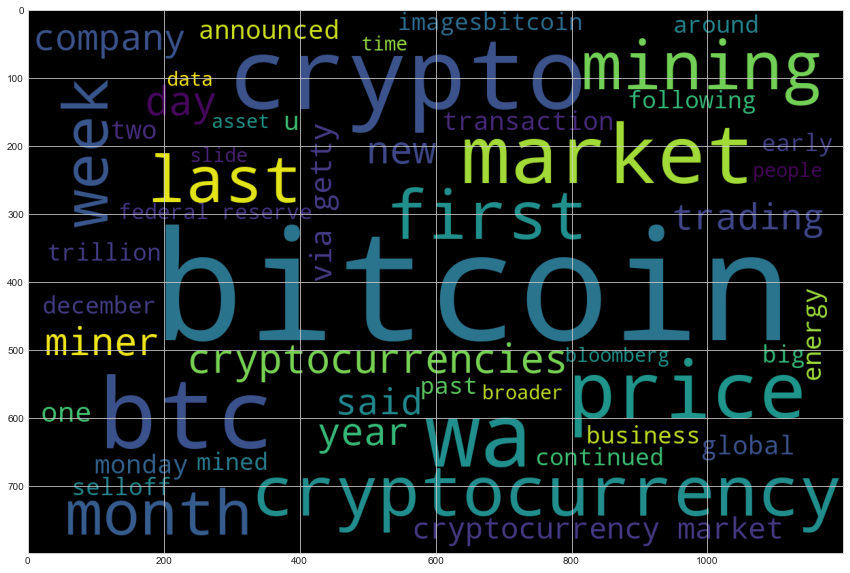

In [29]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_all_tokens)
wc = WordCloud(width=1200, height=800, max_words=50).generate(big_string)
plt.imshow(wc)

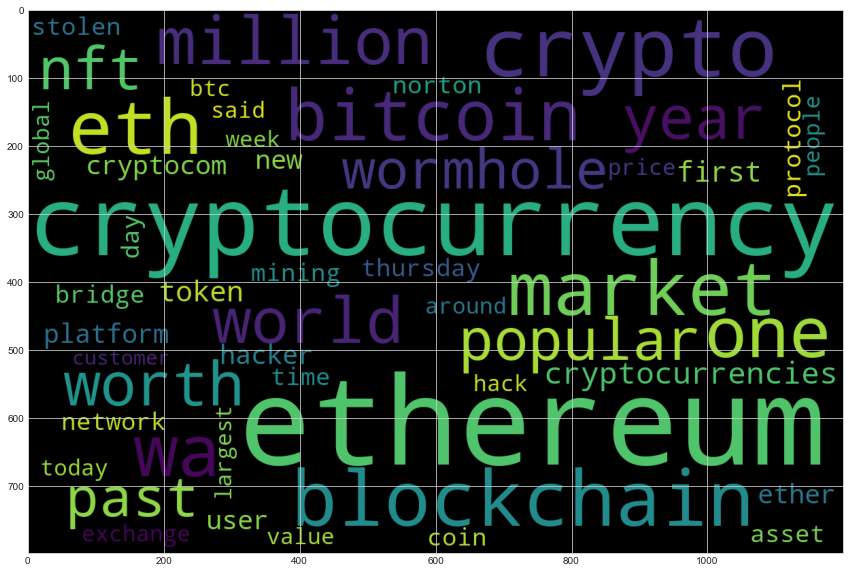

In [30]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_all_tokens)
wc = WordCloud(width=1200, height=800, max_words=50).generate(big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---